In [19]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Generamos 5 predictores (X1 a X5) correlacionados para simular multicolinealidad
N = 100
X_base = np.random.normal(0, 1, N)
X = np.column_stack([
    X_base,
    X_base + np.random.normal(0, 0.3, N),  # X2 muy correlacionado con X1
    X_base + np.random.normal(0, 0.4, N),  # X3
    np.random.normal(0, 1, N),             # X4 independiente
    np.random.normal(0, 1, N)              # X5 independiente
])

# Verdaderos coeficientes
beta_verdaderos = np.array([3.0, 2.5, -1.5, 0.8, 1.2])
intercepto_verdadero = 4.0

# y = intercepto + X @ beta + ruido
sigma_ruido = 3.0
epsilon = np.random.normal(0, sigma_ruido, N)
y = intercepto_verdadero + X @ beta_verdaderos + epsilon

# Matriz de diseño completa: columna de unos + predictores
X_design = np.column_stack((np.ones(N), X))

print("¡Datos generados correctamente!")
print("X_design shape:", X_design.shape)     # Debe ser (100, 6)
print("y shape:", y.shape)                   # Debe ser (100,)
print("Coeficientes verdaderos:", beta_verdaderos)

¡Datos generados correctamente!
X_design shape: (100, 6)
y shape: (100,)
Coeficientes verdaderos: [ 3.   2.5 -1.5  0.8  1.2]


In [20]:
def soft_threshold(rho, lambda_param):
    """
    Operador de sofr-thresholding para L1
    rho: valor sin penalizacion
    lambda_param: penalizacion
    """

    if rho < -lambda_param:
        return rho + lambda_param
    elif rho > lambda_param:
        return rho - lambda_param
    else:
        return 0.0    

In [21]:
def lasso_coordinate_descent(X, y, lambda_param=1.0, max_iter=1000, tol=1e-4):
    """
    Coordinate Descent para Lasso (sin intercepto penalizado)
    X: (N, p) con la columna de unos
    y: (N,)
    """

    n, p = X.shape
    beta = np.zeros(p)   # Inicializada coeficientes en 0

    # Precomputa normal el cuadrado de cada columna (para eficiencia)
    X_norm_sq = np.sum(X**2, axis=0)

    for interation in range(max_iter):
        beta_old = beta.copy()


        for j in range(p):
            # Computa el residuo sin la contribucion de la variable j
            r = y - X @ beta + X[:, j] * beta[j]

            # Rho: correlacion parcial (Xj^T r / ||Xj||^2)
            rho = X[:, j].T @ r / X_norm_sq[j]

            # Actualizacion beta[j] con soft-threshold
            if j == 0:  # Intercepto: no penalizamos
                beta[j] = rho
            else:
                beta[j] = soft_threshold(rho, lambda_param / X_norm_sq[j])

        # Criterio de convergencia
        if np.max(np.abs(beta_old)) < tol:
            print(f"Convergencia en iternacion {interation+1}")
            break
    return beta

In [22]:
lambda_lasso = 0.5  # Prueba valores: 0.1, 0.5, 1.0, 5.0

betas_lasso = lasso_coordinate_descent(X_design, y, lambda_param=lambda_lasso)

print(f"Lasso (λ={lambda_lasso}:")
print(f"Interseto estimado:", betas_lasso[0])
print("Coeficientes estimado:", betas_lasso[1:])



Convergencia en iternacion 1
Lasso (λ=0.5:
Interseto estimado: 3.2347545560075606
Coeficientes estimado: [ 2.92197767  0.16388722 -0.49439704  1.09351084  0.90022734]


Convergencia en iternacion 1
Convergencia en iternacion 1
Convergencia en iternacion 1
Convergencia en iternacion 1
Convergencia en iternacion 1
Convergencia en iternacion 1
Convergencia en iternacion 1
Convergencia en iternacion 1
Convergencia en iternacion 1
Convergencia en iternacion 1
Convergencia en iternacion 1
Convergencia en iternacion 1
Convergencia en iternacion 1
Convergencia en iternacion 1
Convergencia en iternacion 1
Convergencia en iternacion 1
Convergencia en iternacion 1
Convergencia en iternacion 1
Convergencia en iternacion 1
Convergencia en iternacion 1
Convergencia en iternacion 1
Convergencia en iternacion 1
Convergencia en iternacion 1
Convergencia en iternacion 1
Convergencia en iternacion 1
Convergencia en iternacion 1
Convergencia en iternacion 1
Convergencia en iternacion 1
Convergencia en iternacion 1
Convergencia en iternacion 1


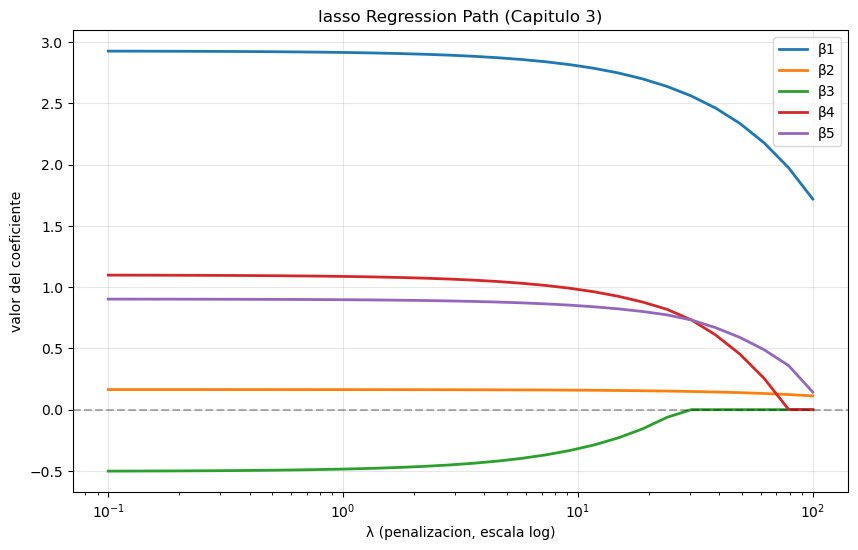

In [23]:
lambdas = np.logspace(-1, 2, 30)  # 0.1  a 100
coef_path_lasso = np.zeros((len(lambdas), 5))

for i, lam in enumerate(lambdas):
    betas = lasso_coordinate_descent(X_design, y, lambda_param=lam)
    coef_path_lasso[i] = betas[1:]  # Sin intercepto

plt.figure(figsize=(10, 6))
for j in range(5):
    plt.plot(lambdas, coef_path_lasso[:, j], label=f'β{j+1}', linewidth=2)

plt.xscale('log')
plt.xlabel('λ (penalizacion, escala log)')
plt.ylabel('valor del coeficiente')
plt.title('lasso Regression Path (Capitulo 3)')
plt.axhline(0, color='k', linestyle='--', alpha=0.3)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()       